In [1]:
                                            #---- Data warehousing ----#
#                                                 ----------------
#-----
import pandas as pd #reading and writing csv files  
import numpy as np # dealing with arrays 
import seaborn as sns # for advanced graphs 
import matplotlib.pyplot as plt # for traditional graphs 
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
                                            #---- Machine learning ----#
#                                                 ----------------

# draw matplotlib graphs inline 
%matplotlib inline
sns.set_style("whitegrid") # configuration for seaborn library

In [ ]:
orders = pd.read_excel('../ex_retail2_forecasting_data.xlsx')

In [ ]:
orders.drop(['Unnamed: 0'],
            axis=1,inplace=True)

In [ ]:
orders.head()

,InvoiceDate,StockCode,Quantity,TotalPrice,Week,Weekday,Day,UnitPrice
0,2009-12-01,10002,12,10.20,49,1,1,0.850000
1,2009-12-01,10120,60,12.60,49,1,1,0.210000
2,2009-12-01,10125,5,5.10,49,1,1,1.020000
3,2009-12-01,10133,23,26.35,49,1,1,1.145652
4,2009-12-01,11001,2,6.86,49,1,1,3.430000


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037173 entries, 0 to 1037172
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Unnamed: 0.1  1037173 non-null  int64  
 1   Unnamed: 0    1037173 non-null  int64  
 2   InvoiceNo     1037173 non-null  int64  
 3   StockCode     1037173 non-null  object 
 4   Description   1037173 non-null  object 
 5   Quantity      1037173 non-null  int64  
 6   InvoiceDate   1037173 non-null  object 
 7   UnitPrice     1037173 non-null  float64
 8   CustomerID    801565 non-null   float64
 9   Country       1037173 non-null  object 
 10  TotalPrice    1037173 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 87.0+ MB


In [ ]:
orders_t = orders

In [ ]:
orders.InvoiceNo = pd.to_numeric(orders.InvoiceNo)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037173 entries, 0 to 1037172
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Unnamed: 0.1  1037173 non-null  int64  
 1   Unnamed: 0    1037173 non-null  int64  
 2   InvoiceNo     1037173 non-null  int64  
 3   StockCode     1037173 non-null  object 
 4   Description   1037173 non-null  object 
 5   Quantity      1037173 non-null  int64  
 6   InvoiceDate   1037173 non-null  object 
 7   UnitPrice     1037173 non-null  float64
 8   CustomerID    801565 non-null   float64
 9   Country       1037173 non-null  object 
 10  TotalPrice    1037173 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 87.0+ MB


In [ ]:
# Convert InvoiceDate to datetime object
orders.InvoiceDate = pd.to_datetime(orders.InvoiceDate)

# Truncate the minutes part of datetime object
orders['InvoiceDate'] = orders.InvoiceDate.dt.date

In [ ]:
# Confirm all cancelled orders have negative TotalPrice and Quantity
# orders['InvoiceNo'] = orders['InvoiceNo'].astype(str)

print(orders[(orders.InvoiceNo.str.startswith('C')) & (orders.TotalPrice<0)])
print(orders[(orders.InvoiceNo.str.startswith('C')) & (orders.Quantity<0)])

Empty DataFrame
Columns: [Unnamed: 0.1, Unnamed: 0, InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice]
Index: []
Empty DataFrame
Columns: [Unnamed: 0.1, Unnamed: 0, InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, TotalPrice]
Index: []


In [ ]:
orders.drop(['Unnamed: 0.1', 'Unnamed: 0', 'InvoiceNo', 'CustomerID','Country','Description','UnitPrice'],
            axis=1,inplace=True)

In [ ]:
orders.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1,inplace=True)

In [ ]:
orders.head()

,InvoiceDate,StockCode,Quantity,TotalPrice,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,UnitPrice
0,2009-12-01,10002,12,10.20,2009,4,12,49,1,1,335,0.850000
1,2009-12-01,10120,60,12.60,2009,4,12,49,1,1,335,0.210000
2,2009-12-01,10125,5,5.10,2009,4,12,49,1,1,335,1.020000
3,2009-12-01,10133,23,26.35,2009,4,12,49,1,1,335,1.145652
4,2009-12-01,11001,2,6.86,2009,4,12,49,1,1,335,3.430000


In [ ]:
orders = orders.groupby(['InvoiceDate', 'StockCode'], as_index=False).sum()

In [ ]:
orders.head(100)

,InvoiceDate,StockCode,Quantity,TotalPrice
0,2009-12-01,10002,12,10.20
1,2009-12-01,10120,60,12.60
2,2009-12-01,10125,5,5.10
3,2009-12-01,10133,23,26.35
4,2009-12-01,11001,2,6.86
...,...,...,...,...
95,2009-12-01,20830,3,6.30
96,2009-12-01,20831,3,6.30
97,2009-12-01,20832,1,1.70
98,2009-12-01,20863,1,4.30


In [ ]:
orders.InvoiceDate = pd.to_datetime(orders.InvoiceDate)

In [ ]:
orders['Year'] = orders.InvoiceDate.dt.year
orders['Quarter'] = orders.InvoiceDate.dt.quarter
orders['Month'] = orders.InvoiceDate.dt.month
orders['Week'] = orders.InvoiceDate.dt.week
orders['Weekday'] = orders.InvoiceDate.dt.weekday
orders['Day'] = orders.InvoiceDate.dt.day
orders['Dayofyear'] = orders.InvoiceDate.dt.dayofyear
orders['UnitPrice'] = orders.TotalPrice/orders.Quantity

C:\Users\pc\AppData\Local\Temp\ipykernel_24528\180242656.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  orders['Week'] = orders.InvoiceDate.dt.week


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530447 entries, 0 to 530446
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceDate  530447 non-null  datetime64[ns]
 1   StockCode    530447 non-null  object        
 2   Quantity     530447 non-null  int64         
 3   TotalPrice   530447 non-null  float64       
 4   Year         530447 non-null  int64         
 5   Quarter      530447 non-null  int64         
 6   Month        530447 non-null  int64         
 7   Week         530447 non-null  int64         
 8   Weekday      530447 non-null  int64         
 9   Day          530447 non-null  int64         
 10  Dayofyear    530447 non-null  int64         
 11  UnitPrice    530447 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(8), object(1)
memory usage: 48.6+ MB


In [ ]:
orders.describe()

,Quantity,TotalPrice,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,UnitPrice
count,530447.000000,530447.000000,530447.000000,530447.000000,530447.000000,530447.000000,530447.000000,530447.00000,530447.000000,530447.000000
mean,19.586815,34.436133,2010.439303,2.679548,7.067911,28.619148,2.517865,15.32725,199.125375,3.495316
std,64.059863,71.381389,0.573044,1.145581,3.504972,15.205946,1.897490,8.62127,106.153333,8.090734
min,1.000000,0.001000,2009.000000,1.000000,1.000000,1.000000,0.000000,1.00000,4.000000,0.001000
25%,2.000000,5.800000,2010.000000,2.000000,4.000000,15.000000,1.000000,8.00000,106.000000,1.250000
50%,6.000000,15.000000,2010.000000,3.000000,7.000000,30.000000,2.000000,15.00000,208.000000,2.100000
75%,18.000000,32.750000,2011.000000,4.000000,10.000000,43.000000,4.000000,23.00000,297.000000,4.130000
max,7128.000000,3996.760000,2011.000000,4.000000,12.000000,52.000000,6.000000,31.00000,357.000000,604.120000


In [ ]:
# Drop rows with negative Quantity

orders = orders.drop(orders[orders.Quantity<=0].index).reset_index(drop=True)
orders = orders.drop(orders[orders.TotalPrice<=0].index).reset_index(drop=True)

# Removing outliers in Quantity and TotalPrice
orders = orders[(np.abs(stats.zscore(orders.Quantity)) < 3)]
orders = orders[(np.abs(stats.zscore(orders.TotalPrice)) < 3)]

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515720 entries, 0 to 530446
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceDate  515720 non-null  datetime64[ns]
 1   StockCode    515720 non-null  object        
 2   Quantity     515720 non-null  int64         
 3   TotalPrice   515720 non-null  float64       
 4   Year         515720 non-null  int64         
 5   Quarter      515720 non-null  int64         
 6   Month        515720 non-null  int64         
 7   Week         515720 non-null  int64         
 8   Weekday      515720 non-null  int64         
 9   Day          515720 non-null  int64         
 10  Dayofyear    515720 non-null  int64         
 11  UnitPrice    515720 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(8), object(1)
memory usage: 51.2+ MB


In [ ]:
orders.describe()

,Quantity,TotalPrice,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,UnitPrice
count,515720.000000,515720.000000,515720.000000,515720.000000,515720.000000,515720.000000,515720.000000,515720.000000,515720.000000,515720.000000
mean,14.311580,25.566179,2010.440148,2.674352,7.050419,28.543382,2.527317,15.338787,198.604000,3.327203
std,22.386213,32.923020,0.573039,1.145600,3.503978,15.203342,1.903652,8.622299,106.138109,4.698653
min,1.000000,0.001000,2009.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000,0.001000
25%,2.000000,5.100000,2010.000000,2.000000,4.000000,15.000000,1.000000,8.000000,105.000000,1.250000
50%,6.000000,14.850000,2010.000000,3.000000,7.000000,30.000000,2.000000,15.000000,207.000000,2.100000
75%,16.000000,30.000000,2011.000000,4.000000,10.000000,42.000000,4.000000,23.000000,297.000000,4.130000
max,211.000000,211.320000,2011.000000,4.000000,12.000000,52.000000,6.000000,31.000000,357.000000,208.920000


C:\Users\pc\AppData\Local\Temp\ipykernel_24528\2934381453.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = orders.corr()


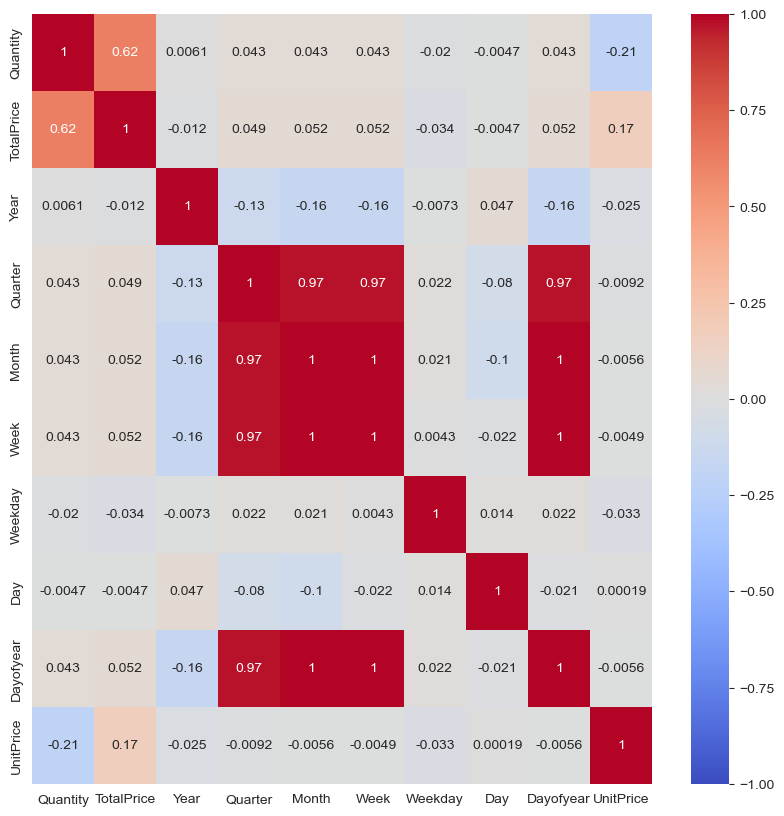

In [ ]:
corrmat = orders.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10, 10))

g = sns.heatmap(orders[top_corr_features].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)

In [ ]:
orders.drop(['Month', 'Quarter','Dayofyear','Year'], axis=1,inplace=True)

In [ ]:
orders.head()

,InvoiceDate,StockCode,Quantity,TotalPrice,Week,Weekday,Day,UnitPrice
0,2009-12-01,10002,12,10.20,49,1,1,0.850000
1,2009-12-01,10120,60,12.60,49,1,1,0.210000
2,2009-12-01,10125,5,5.10,49,1,1,1.020000
3,2009-12-01,10133,23,26.35,49,1,1,1.145652
4,2009-12-01,11001,2,6.86,49,1,1,3.430000


In [ ]:
orders.to_excel('ex_retail2_forecasting_data.xlsx')

#### Preperation for the traing and testing datasets

In [ ]:
orders = pd.read_excel('ex_retail2_forecasting_data.xlsx')

In [ ]:
# Split the dataset into train and test dataset

df_train = orders[orders.InvoiceDate<'2011-11-01']
df_test = orders[orders.InvoiceDate>='2011-11-01']

In [ ]:
df_train.head()

,InvoiceDate,StockCode,Quantity,TotalPrice,Week,Weekday,Day,UnitPrice
0,2009-12-01,10002,12,10.20,49,1,1,0.850000
1,2009-12-01,10120,60,12.60,49,1,1,0.210000
2,2009-12-01,10125,5,5.10,49,1,1,1.020000
3,2009-12-01,10133,23,26.35,49,1,1,1.145652
4,2009-12-01,11001,2,6.86,49,1,1,3.430000


In [ ]:
# Define the feature and target variables

X_train = df_train.drop(labels=['InvoiceDate','StockCode','Quantity','TotalPrice'],axis=1)
y_train = df_train.Quantity

X_test = df_test.drop(labels=['InvoiceDate','StockCode','Quantity','TotalPrice'],axis=1)
y_test = df_test.Quantity

In [ ]:
# Data Frame to store all the RMSE scores for various algorithms
algo_score = pd.DataFrame()
algo_score.index.name = 'Modelling Algo'
algo_score['Train RMSE'] = None
algo_score['Test RMSE'] = None
algo_score['Hyperparameters'] = None
algo_score['Training+Test Time(sec)'] = None

cv_time = []

# Dataframes for second level of predictions. Collect the predicted y values for training and test set of data
ypred_train = pd.DataFrame(index = X_train.index)
ypred_test = pd.DataFrame(index = X_test.index)

ypred_train['quantity'], ypred_test['quantity'] = y_train, y_test


In [ ]:
def rmse(y_actual, y_pred):
    rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
    return rmse
rmse_cv = make_scorer(rmse, greater_is_better=False)

In [ ]:
def plot_true_vs_pred(y_actual, y_pred):
    fig = plt.figure(figsize=(18, 16))

    pred_val = pd.DataFrame({'actual':y_actual, 'predicted':y_pred})
    pred_val['error'] = abs(pred_val.actual.round(0), pred_val.error)
    sns.swarmplot(pred_val.actual.round(0), pred_val.error)
    plt.show()

In [ ]:
# Function to predict on train and test data and return the required metrics
def model_fit(model, X_train, y_train, X_test, y_test):
    ''' 
    Input:
        model = model to be applied
        X_train y_train = Training data
        X_test, y_test = Testing data
    Output:
        rmse for training and test data 
        predicted y for training and test data
    
    '''
#     model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    rmse_train = rmse(y_train, y_train_predict)
    rmse_test = rmse(y_test, y_test_predict)
    
    rmse_all = [rmse_train, rmse_test]
    y_pred_all = [y_train_predict, y_test_predict]
    
    return(rmse_all, y_pred_all)

In [ ]:
def cross_val(model, X_train, y_train, cv=5):
#     y_pred = pd.Series(index=y_train.index)
    y_pred = cross_val_predict(model,X_train,y_train,cv=5)

    rmse_train = rmse(y_train,y_pred)
    return(rmse_train, y_pred)

#### Linear regression - LR


In [ ]:
reg = LinearRegression()

param_summary = ['','']
rmse_summary = 0
y_predict_summary = 0
%time reg.fit(X_train, y_train)
%time rmse_summary, y_predict_summary = model_fit(reg, X_train, y_train, X_test, y_test)

ypred_test['LR'] = y_predict_summary[1]  
ypred_train['LR'] = y_predict_summary[0]

algo_score.loc['Linear Regression'] = rmse_summary+param_summary

CPU times: total: 31.2 ms
Wall time: 54 ms
CPU times: total: 46.9 ms
Wall time: 14 ms


In [ ]:
algo_score.loc['Linear Regression', 'Training+Test Time(sec)'] = 0.0781
cv_time.append(0.0781)
algo_score

,Train RMSE,Test RMSE,Hyperparameters,Training+Test Time(sec)
Modelling Algo,,,,
Linear Regression,21.785403,22.659021,,0.0781


In [ ]:
# Features and the Estimated Linear Regression Coefficients
df_coeff = pd.DataFrame({'features': X_train.columns, 'Lin_Coeff': reg.coef_})

In [ ]:
df_coeff

,features,Lin_Coeff
0,Week,0.064276
1,Weekday,-0.307444
2,Day,-0.002023
3,UnitPrice,-0.973563


### Regularization Model - Ridge


In [ ]:

# Hyperparameter Tuning
param_grid = {'alpha': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]}
ridge = GridSearchCV(Ridge(random_state=42), param_grid, cv=5, scoring=rmse_cv)
%time ridge.fit(X_train, y_train)
print('Best alpha for Ridge Regression Model: {}'.format(ridge.best_params_))

CPU times: total: 1.19 s
Wall time: 1.74 s
Best alpha for Ridge Regression Model: {'alpha': 100}


In [ ]:
# Fine tune Hyperparameter for edge cases
param_grid = {'alpha': np.arange(75,150,10)}
ridge = GridSearchCV(Ridge(random_state=42), param_grid, cv=5, scoring=rmse_cv)
%time ridge.fit(X_train, y_train)
print('Best alpha for Ridge Regression Model: {}'.format(ridge.best_params_))

CPU times: total: 1.05 s
Wall time: 1.33 s
Best alpha for Ridge Regression Model: {'alpha': 145}


In [ ]:
param_summary = [ridge.best_params_,'']

%time rmse_summary, y_predict_summary = model_fit(ridge, X_train, y_train, X_test, y_test)

ypred_test['Ridge'] = y_predict_summary[1]  
ypred_train['Ridge'] = y_predict_summary[0]

algo_score.loc['Ridge Regression'] = rmse_summary+param_summary

CPU times: total: 0 ns
Wall time: 12 ms


In [ ]:
algo_score.loc['Ridge Regression', 'Training+Test Time(sec)'] = 6.917
cv_time.append(0.012)
algo_score

,Train RMSE,Test RMSE,Hyperparameters,Training+Test Time(sec)
Modelling Algo,,,,
Linear Regression,21.785403,22.659021,,0.0781
Ridge Regression,21.785403,22.659026,{'alpha': 145},6.917


In [ ]:
# Features and the Estimated Ridge Regression Coefficients
df_coeff['Ridge_Coeff'] = ridge.best_estimator_.coef_


### Regularization Model - Lasso

In [ ]:
# Hyperparameter Tuning
param_grid = {'alpha': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]}
lasso = GridSearchCV(Lasso(random_state=42), param_grid, cv=5, scoring=rmse_cv)
%time lasso.fit(X_train, y_train)
print('Best alpha for Lasso Regression Model: {}'.format(lasso.best_params_))

CPU times: total: 4.86 s
Wall time: 2.26 s
Best alpha for Lasso Regression Model: {'alpha': 0.2}


In [ ]:
# Fine tune Hyperparameter for edge case

param_grid = {'alpha': np.arange(.01,.25,.01)}
lasso = GridSearchCV(Lasso(random_state=42), param_grid, cv=5, scoring=rmse_cv)
%time lasso.fit(X_train, y_train)
print('Best alpha for Lasso Regression Model: {}'.format(lasso.best_params_))

CPU times: total: 15 s
Wall time: 6.02 s
Best alpha for Lasso Regression Model: {'alpha': 0.24000000000000002}


In [ ]:
param_summary = [lasso.best_params_,'']

%time rmse_summary, y_predict_summary = model_fit(lasso, X_train, y_train, X_test, y_test)
ypred_test['Lasso'] = y_predict_summary[1]
ypred_train['Lasso'] = y_predict_summary[0]

algo_score.loc['Lasso Regression'] = rmse_summary+param_summary

CPU times: total: 0 ns
Wall time: 16 ms


In [ ]:
algo_score.loc['Lasso Regression', 'Training+Test Time(sec)'] = 31.328
cv_time.append(0.16)
algo_score

,Train RMSE,Test RMSE,Hyperparameters,Training+Test Time(sec)
Modelling Algo,,,,
Linear Regression,21.785403,22.659021,,0.0781
Ridge Regression,21.785403,22.659026,{'alpha': 145},6.917
Lasso Regression,21.785848,22.664895,{'alpha': 0.24000000000000002},31.328


In [ ]:
# Features and the Estimated Lasso Regression Coefficients
df_coeff['Lasso_Coeff'] = lasso.best_estimator_.coef_


### Plotting the coefficients obtained from Linear, Ridge and Lasso regression

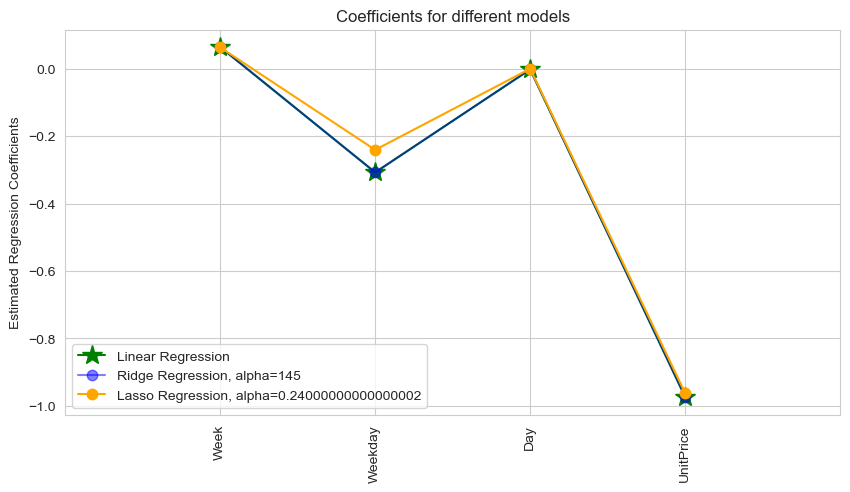

In [ ]:
fig = plt.figure(figsize=(10, 5))

axes = fig.add_subplot(1, 1, 1)
axes.plot(df_coeff.Lin_Coeff, label='Linear Regression', marker='*', markersize=15, color='green')
axes.plot(df_coeff.Ridge_Coeff, label='Ridge Regression, alpha={}'.format(ridge.best_params_['alpha']), alpha=.5,marker='.', markersize=15, color='blue')
axes.plot(df_coeff.Lasso_Coeff, label='Lasso Regression, alpha={}'.format(lasso.best_params_['alpha']), marker='.', markersize=15, color='orange')

plt.xticks(range(len(df_coeff.Lin_Coeff)), df_coeff.features, rotation=90)
axes.set(ylabel='Estimated Regression Coefficients', title='Coefficients for different models')
axes.set(xlim=[-1, len(df_coeff.Lin_Coeff)])
axes.legend()


### Ensemble Model - Random Forest


In [ ]:
param_distributions = {'n_estimators': [50,500,1000], 'max_features':['auto'], 'min_samples_leaf':[1,10,50],'n_jobs':[-1]}
rf_main = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions, verbose=2, n_iter = 50,cv=5, 
                             scoring=rmse_cv)
%time rf_main.fit(X_train, y_train)

In [ ]:
print('Best parameters for Random Forest Regression Model: {}'.format(rf_main.best_params_))

Best parameters for Random Forest Regression Model: {'n_jobs': -1, 'n_estimators': 1000, 'min_samples_leaf': 10, 'max_features': 'auto'}


In [ ]:
param_summary = [rf_main.best_params_,'']

%time rmse_summary, y_predict_summary = model_fit(rf_main, X_train, y_train, X_test, y_test)
ypred_test['RF'] = y_predict_summary[1]
ypred_train['RF'] = y_predict_summary[0]

algo_score.loc['Random Forest'] = rmse_summary+param_summary


CPU times: total: 1min 7s
Wall time: 7.84 s


In [ ]:
algo_score.loc['Random Forest', 'Training+Test Time(sec)'] = 6706
cv_time.append(1600.84)
algo_score

,Train RMSE,Test RMSE,Hyperparameters,Training+Test Time(sec)
Modelling Algo,,,,
Linear Regression,21.785403,22.659021,,0.0781
Ridge Regression,21.785403,22.659026,{'alpha': 145},6.917
Lasso Regression,21.785848,22.664895,{'alpha': 0.24000000000000002},31.328
Random Forest,15.699580,20.106121,"{'n_jobs': -1, 'n_estimators': 1000, 'min_samp...",6706


In [99]:
rf_result=pd.DataFrame(rf_main.cv_results_)
rf_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_jobs,param_n_estimators,param_min_samples_leaf,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.881960,4.961139,0.094398,0.012627,-1,50,1,auto,"{'n_jobs': -1, 'n_estimators': 50, 'min_sample...",-19.180855,-17.874483,-19.276246,-17.619200,-20.141531,-18.818463,0.940291,9
1,38.928034,1.594758,0.731023,0.072578,-1,500,1,auto,"{'n_jobs': -1, 'n_estimators': 500, 'min_sampl...",-19.145443,-17.817329,-19.219675,-17.532577,-20.130248,-18.769054,0.962521,8
2,73.133856,0.891001,2.067060,1.282902,-1,1000,1,auto,"{'n_jobs': -1, 'n_estimators': 1000, 'min_samp...",-19.107080,-17.811706,-19.211788,-17.532878,-20.138073,-18.760305,0.962159,7
3,3.394570,0.056939,0.083982,0.031879,-1,50,10,auto,"{'n_jobs': -1, 'n_estimators': 50, 'min_sample...",-18.652239,-17.605011,-18.775676,-17.242858,-19.339953,-18.323147,0.778424,6
4,29.876315,0.357813,0.496946,0.015328,-1,500,10,auto,"{'n_jobs': -1, 'n_estimators': 500, 'min_sampl...",-18.676096,-17.580932,-18.765569,-17.208670,-19.331068,-18.312467,0.791023,3
5,61.844467,1.435422,1.014092,0.058075,-1,1000,10,auto,"{'n_jobs': -1, 'n_estimators': 1000, 'min_samp...",-18.654451,-17.576925,-18.765124,-17.210949,-19.339572,-18.309404,0.791342,1
6,3.224118,0.184368,0.058334,0.005732,-1,50,50,auto,"{'n_jobs': -1, 'n_estimators': 50, 'min_sample...",-18.600351,-17.666183,-18.853179,-17.410919,-19.057379,-18.317602,0.657340,5
7,27.968939,1.001916,0.443719,0.031330,-1,500,50,auto,"{'n_jobs': -1, 'n_estimators': 500, 'min_sampl...",-18.590410,-17.657125,-18.864600,-17.384420,-19.057938,-18.310899,0.667617,2
8,54.629493,1.172630,0.818654,0.031634,-1,1000,50,auto,"{'n_jobs': -1, 'n_estimators': 1000, 'min_samp...",-18.599426,-17.656131,-18.865282,-17.390087,-19.063721,-18.314929,0.668411,4


In [100]:
est_score = rf_result.groupby('param_n_estimators')['mean_test_score'].mean()
est_score

param_n_estimators
50     -18.486404
500    -18.464140
1000   -18.461546
Name: mean_test_score, dtype: float64

[Text(0.5, 0, 'n_estimators'),
 Text(0, 0.5, 'Mean CV Test Score'),
 Text(0.5, 1.0, 'n_estimators vs. Score (best_n_estimator = 500)')]

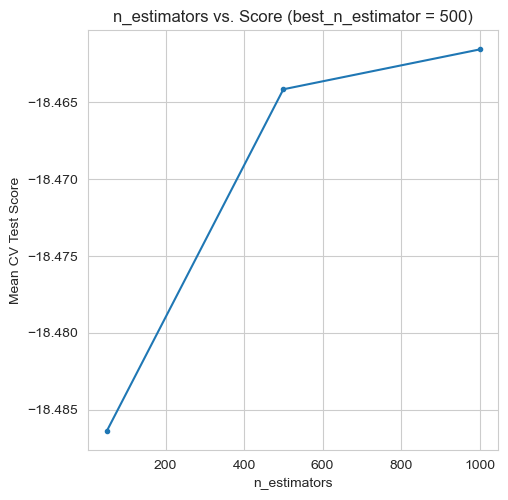

In [101]:
fig=plt.figure(figsize=(18, 12))

axes=fig.add_subplot(2, 3, 1)
axes.plot(est_score.index, est_score.values, marker='.')
axes.set(xlabel='n_estimators', ylabel='Mean CV Test Score', title='n_estimators vs. Score (best_n_estimator = 500)')


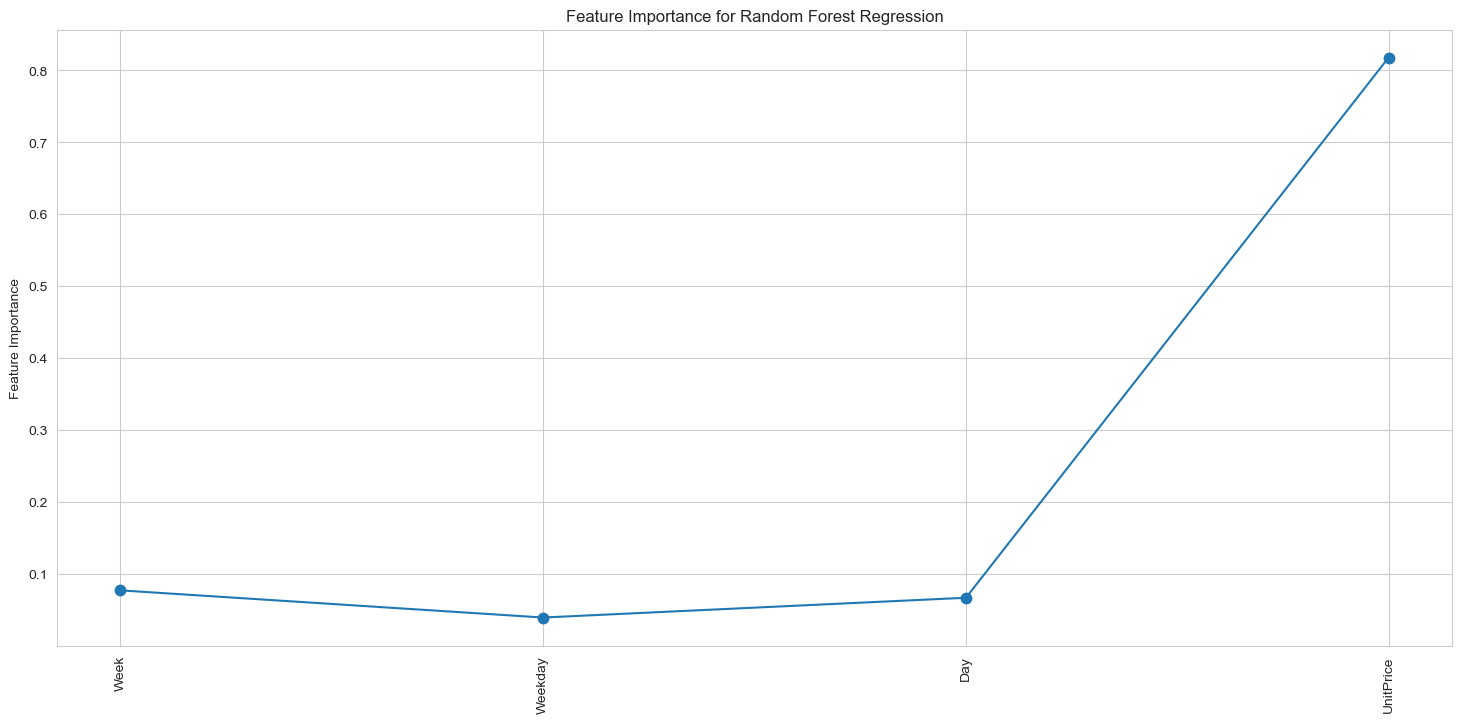

In [102]:
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 1, 1)
axes.plot(rf_main.best_estimator_.feature_importances_, marker='.', markersize=15)
plt.xticks(range(len(rf_main.best_estimator_.feature_importances_)), X_train.columns,rotation=90)
axes.set(ylabel='Feature Importance', title='Feature Importance for Random Forest Regression')

plt.show()


In [ ]:

param_distributions = {'n_estimators': [50,100,500,1000], 'learning_rate':[0.01, 0.05, 0.1],'max_features':['auto'], 'min_samples_leaf':[1, 3, 7, 10], 'min_samples_split':[2,5,10]}
grad_boost = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), param_distributions, verbose=2, n_iter = 100,cv=5, scoring=rmse_cv)
grad_boost.fit(X_train, y_train)


In [1]:
print('Best parameters for Gradient Boost Model: {}'.format(grad_boost.best_params_))

NameError: name 'grad_boost' is not defined

In [ ]:
# Following code uses the best parameters generated above to fit the model

from sklearn.ensemble import GradientBoostingRegressor

param_distributions = {'n_estimators': [500], 'learning_rate':[0.01],'max_features':['sqrt'], 'min_samples_leaf':[10], 'max_depth':[60], 'min_samples_split':[2]}
grad_boost = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), param_distributions, n_iter = 100,cv=5, scoring=rmse_cv)
%time grad_boost.fit(X_train, y_train)

In [ ]:
print('Best parameters for Gradient Boost Model: {}'.format(grad_boost.best_params_))

In [ ]:
param_summary = [grad_boost.best_params_,'']

%time rmse_summary, y_predict_summary = model_fit(grad_boost, X_train, y_train, X_test, y_test)
ypred_test['GB'] = y_predict_summary[1]
ypred_train['GB'] = y_predict_summary[0]

algo_score.loc['Gradient Boost'] = rmse_summary+param_summary

In [ ]:
algo_score.loc['Gradient Boost', 'Training+Test Time(sec)'] = 89.796
cv_time.append(89.796)
algo_score

In [ ]:
gb_result=pd.DataFrame(grad_boost.cv_results_)
gb_result

In [ ]:
gb_score = gb_result.groupby('param_n_estimators')['mean_test_score'].mean()
gb_score

In [ ]:
fig=plt.figure(figsize=(18, 12))

axes=fig.add_subplot(2, 3, 1)
axes.plot(gb_score.index, gb_score.values, marker='.')
axes.set(xlabel='n_estimators', ylabel='Mean CV Test Score', title='n_estimators vs. Score (best_n_estimator = 500)')


In [ ]:
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 1, 1)
axes.plot(grad_boost.best_estimator_.feature_importances_, marker='.', markersize=15)
plt.xticks(range(len(grad_boost.best_estimator_.feature_importances_)), X_train.columns,rotation=90)
axes.set(ylabel='Feature Importance', title='Feature Importance for Gradient Boost Regressor')
# axes.set(xlim=[-1, len(X_train.columns)], ylim=[0, 1])

plt.show()


In [ ]:
fig=plt.figure(figsize=(10, 6))
axes=fig.add_subplot(1, 1, 1)
bar_width = 0.3
idx = np.array(range(algo_score.shape[0]))
labels = algo_score.index
plt.bar(data=algo_score, height='Train RMSE', x=idx, color='g', width=bar_width, label='Training Data')
plt.bar(data=algo_score, height='Test RMSE', x=idx+bar_width, color='b', width=bar_width, label='Test Data')
plt.xticks(idx, labels, rotation=90)
plt.xlabel('Modelling Algorithms')
plt.ylabel('RMSE')
plt.title('Average RMSE for different Modelling Algorithms')
plt.legend()
plt.show()

In [ ]:
fig=plt.figure(figsize=(10, 6))
axes=fig.add_subplot(1, 1, 1)
bar_width = 0.6
idx = np.array(range(algo_score.shape[0]))
labels = algo_score.index
plt.bar(data=algo_score, height='Training+Test Time(sec)', x=idx, width=bar_width)
plt.xticks(idx, labels, rotation=90)
plt.xlabel('Modelling Algorithms')
plt.ylabel('Training+Test Time(sec)')
plt.title('Training Time + Test Time for different Models (sec)')
#axes.set_yscale('log')
plt.show()